In [0]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, Activation, Dense, Dropout, Flatten
from keras import backend as K

In [8]:
from google.colab import files
uploaded = files.upload()

Saving processed.csv to processed (1).csv


KeyboardInterrupt: ignored

In [9]:
uploaded = files.upload()

Saving processed_target.csv to processed_target.csv


In [0]:
m = pd.read_csv('processed.csv')
m_target = pd.read_csv('processed_target.csv', header=None)

In [11]:
print(len(m))
print(len(m_target))

178665
178665


In [12]:
m.columns

Index(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '3', '4', '5', '6', '7', '8', '9',
       'ANDROID-BOOKS_AND_REFERENCE', 'ANDROID-COMMUNICATION',
       'ANDROID-DATING', 'ANDROID-ENTERTAINMENT', 'ANDROID-GAME_ACTION',
       'ANDROID-GAME_ADVENTURE', 'ANDROID-GAME_ARCADE', 'ANDROID-GAME_BOARD',
       'ANDROID-GAME_CARD', 'ANDROID-GAME_CASINO', 'ANDROID-GAME_CASUAL',
       'ANDROID-GAME_MUSIC', 'ANDROID-GAME_PUZZLE', 'ANDROID-GAME_RACING',
       'ANDROID-GAME_ROLE_PLAYING', 'ANDROID-GAME_SIMULATION',
       'ANDROID-GAME_SPORTS', 'ANDROID-GAME_STRATEGY', 'ANDROID-GAME_TRIVIA',
       'ANDROID-GAME_WORD', 'ANDROID-HEALTH_AND_FITNESS', 'ANDROID-LIFESTYLE',
       'ANDROID-MAPS_AND_NAVIGATION', 'ANDROID-MUSIC_AND_AUDIO',
       'ANDROID-NEWS_AND_MAGAZINES', 'ANDROID-PERSONALIZATION',
       'ANDROID-PHOTOGRAPHY', 'ANDROID-PRODUCTIVITY', 'ANDROID-SOCIAL',
       'ANDROID-SPORTS', 'ANDROID-TOOLS', 'ANDROID-TRAVEL_AND_LOCAL'

In [0]:
X = m
Y = m_target

In [14]:
input_len = len(X.columns)
print(input_len)

73


In [0]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
  
def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [28]:
# Model Params
batch_size = 100
epochs = 100

# create baseline_model
model = Sequential()
model.add(Dense(80, input_dim=input_len, kernel_initializer='RandomNormal', activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
model.compile(loss=['mape'], optimizer='adam', metrics=[coeff_determination,root_mean_squared_error])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 80)                5920      
_________________________________________________________________
dense_18 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_19 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 21        
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________


In [29]:
early_stopping = EarlyStopping(patience=15, verbose=1)
checkpointer = ModelCheckpoint(filepath=r'age_prediction.hdf5', 
                               verbose=1, 
                               save_best_only=True)

model.fit(X, Y, 
          batch_size=batch_size, 
          epochs = epochs, 
          verbose=1,
          shuffle=True,
          validation_split=0.1,
         callbacks=[early_stopping, checkpointer])

Train on 160798 samples, validate on 17867 samples
Epoch 1/100
160798/160798 [==============================] - 12s 73us/step - loss: 45.3582 - coeff_determination: -2.7480 - root_mean_squared_error: 13.5884 - val_loss: 29.0453 - val_coeff_determination: -0.5846 - val_root_mean_squared_error: 9.2588

Epoch 00001: val_loss improved from inf to 29.04533, saving model to age_prediction.hdf5
Epoch 2/100
 80000/160798 [=============>................] - ETA: 5s - loss: 30.1237 - coeff_determination: -0.7661 - root_mean_squared_error: 9.5207

160798/160798 [==============================] - 12s 74us/step - loss: 28.8598 - coeff_determination: -0.6726 - root_mean_squared_error: 9.1748 - val_loss: 27.9466 - val_coeff_determination: -0.6463 - val_root_mean_squared_error: 8.9961

Epoch 00002: val_loss improved from 29.04533 to 27.94662, saving model to age_prediction.hdf5
Epoch 3/100
133000/160798 [=======================>......] - ETA: 1s - loss: 25.8297 - coeff_determination: -0.4337 - root_mean_squared_error: 8.3665

160798/160798 [==============================] - 12s 73us/step - loss: 25.7784 - coeff_determination: -0.4328 - root_mean_squared_error: 8.3520 - val_loss: 26.8269 - val_coeff_determination: -0.6486 - val_root_mean_squared_error: 9.1574

Epoch 00003: val_loss improved from 27.94662 to 26.82685, saving model to age_prediction.hdf5
Epoch 4/100
146900/160798 [==========================>...] - ETA: 0s - loss: 23.9125 - coeff_determination: -0.3065 - root_mean_squared_error: 7.8602

160798/160798 [==============================] - 12s 74us/step - loss: 23.8424 - coeff_determination: -0.3017 - root_mean_squared_error: 7.8426 - val_loss: 28.5877 - val_coeff_determination: -0.4561 - val_root_mean_squared_error: 8.4903

Epoch 00004: val_loss did not improve from 26.82685
Epoch 5/100
160798/160798 [==============================] - 12s 73us/step - loss: 22.8678 - coeff_determination: -0.2436 - root_mean_squared_error: 7.5837 - val_loss: 21.9703 - val_coeff_determination: -0.2453 - val_root_mean_squared_error: 7.5621

Epoch 00005: val_loss improved from 26.82685 to 21.97026, saving model to age_prediction.hdf5
Epoch 6/100
  2400/160798 [..............................] - ETA: 11s - loss: 21.5003 - coeff_determination: -0.1601 - root_mean_squared_error: 7.2588

160798/160798 [==============================] - 12s 73us/step - loss: 22.0507 - coeff_determination: -0.1970 - root_mean_squared_error: 7.3805 - val_loss: 21.3558 - val_coeff_determination: -0.1650 - val_root_mean_squared_error: 7.3042

Epoch 00006: val_loss improved from 21.97026 to 21.35584, saving model to age_prediction.hdf5
Epoch 7/100
110900/160798 [===================>..........] - ETA: 3s - loss: 21.7516 - coeff_determination: -0.1830 - root_mean_squared_error: 7.3012

160798/160798 [==============================] - 12s 73us/step - loss: 21.6844 - coeff_determination: -0.1776 - root_mean_squared_error: 7.2890 - val_loss: 21.3613 - val_coeff_determination: -0.2432 - val_root_mean_squared_error: 7.4977

Epoch 00007: val_loss did not improve from 21.35584
Epoch 8/100
155600/160798 [============================>.] - ETA: 0s - loss: 21.2769 - coeff_determination: -0.1547 - root_mean_squared_error: 7.1771

160798/160798 [==============================] - 12s 73us/step - loss: 21.2734 - coeff_determination: -0.1540 - root_mean_squared_error: 7.1750 - val_loss: 20.7253 - val_coeff_determination: -0.1322 - val_root_mean_squared_error: 7.1095

Epoch 00008: val_loss improved from 21.35584 to 20.72527, saving model to age_prediction.hdf5
Epoch 9/100
153700/160798 [===========================>..] - ETA: 0s - loss: 21.1961 - coeff_determination: -0.1480 - root_mean_squared_error: 7.1529

160798/160798 [==============================] - 12s 74us/step - loss: 21.1955 - coeff_determination: -0.1476 - root_mean_squared_error: 7.1514 - val_loss: 20.7724 - val_coeff_determination: -0.0931 - val_root_mean_squared_error: 7.0256

Epoch 00009: val_loss did not improve from 20.72527
Epoch 10/100
160798/160798 [==============================] - 12s 73us/step - loss: 20.9530 - coeff_determination: -0.1255 - root_mean_squared_error: 7.0595 - val_loss: 22.0103 - val_coeff_determination: -0.3249 - val_root_mean_squared_error: 7.8187

Epoch 00010: val_loss did not improve from 20.72527
Epoch 11/100
  4000/160798 [..............................] - ETA: 11s - loss: 22.0125 - coeff_determination: -0.2086 - root_mean_squared_error: 7.5705

160798/160798 [==============================] - 12s 73us/step - loss: 20.7041 - coeff_determination: -0.1118 - root_mean_squared_error: 6.9857 - val_loss: 20.6765 - val_coeff_determination: -0.0799 - val_root_mean_squared_error: 6.9569

Epoch 00011: val_loss improved from 20.72527 to 20.67653, saving model to age_prediction.hdf5
Epoch 12/100
111200/160798 [===================>..........] - ETA: 3s - loss: 20.5803 - coeff_determination: -0.1033 - root_mean_squared_error: 6.9366

160798/160798 [==============================] - 12s 73us/step - loss: 20.6299 - coeff_determination: -0.1088 - root_mean_squared_error: 6.9612 - val_loss: 20.8239 - val_coeff_determination: -0.1330 - val_root_mean_squared_error: 7.1377

Epoch 00012: val_loss did not improve from 20.67653
Epoch 13/100
155900/160798 [============================>.] - ETA: 0s - loss: 20.5270 - coeff_determination: -0.1001 - root_mean_squared_error: 6.9278

160798/160798 [==============================] - 12s 73us/step - loss: 20.5170 - coeff_determination: -0.0989 - root_mean_squared_error: 6.9193 - val_loss: 20.4657 - val_coeff_determination: -0.0726 - val_root_mean_squared_error: 6.9049

Epoch 00013: val_loss improved from 20.67653 to 20.46572, saving model to age_prediction.hdf5
Epoch 14/100
154100/160798 [===========================>..] - ETA: 0s - loss: 20.4781 - coeff_determination: -0.0974 - root_mean_squared_error: 6.9025

160798/160798 [==============================] - 12s 73us/step - loss: 20.4672 - coeff_determination: -0.0968 - root_mean_squared_error: 6.9020 - val_loss: 20.7184 - val_coeff_determination: -0.0402 - val_root_mean_squared_error: 6.8573

Epoch 00014: val_loss did not improve from 20.46572
Epoch 15/100
160798/160798 [==============================] - 12s 73us/step - loss: 20.3869 - coeff_determination: -0.0881 - root_mean_squared_error: 6.8675 - val_loss: 20.6480 - val_coeff_determination: -0.1788 - val_root_mean_squared_error: 7.2056

Epoch 00015: val_loss did not improve from 20.46572
Epoch 16/100
  4700/160798 [..............................] - ETA: 11s - loss: 20.7000 - coeff_determination: -0.1058 - root_mean_squared_error: 7.0126

160798/160798 [==============================] - 12s 74us/step - loss: 20.3337 - coeff_determination: -0.0849 - root_mean_squared_error: 6.8501 - val_loss: 20.1746 - val_coeff_determination: -0.1230 - val_root_mean_squared_error: 6.9934

Epoch 00016: val_loss improved from 20.46572 to 20.17464, saving model to age_prediction.hdf5
Epoch 17/100
108500/160798 [===================>..........] - ETA: 3s - loss: 20.2568 - coeff_determination: -0.0822 - root_mean_squared_error: 6.8309

160798/160798 [==============================] - 12s 74us/step - loss: 20.3254 - coeff_determination: -0.0832 - root_mean_squared_error: 6.8418 - val_loss: 20.0736 - val_coeff_determination: -0.0523 - val_root_mean_squared_error: 6.7864

Epoch 00017: val_loss improved from 20.17464 to 20.07361, saving model to age_prediction.hdf5
Epoch 18/100
139600/160798 [=========================>....] - ETA: 1s - loss: 20.2243 - coeff_determination: -0.0772 - root_mean_squared_error: 6.8174

160798/160798 [==============================] - 12s 74us/step - loss: 20.2575 - coeff_determination: -0.0789 - root_mean_squared_error: 6.8236 - val_loss: 20.2655 - val_coeff_determination: -0.0998 - val_root_mean_squared_error: 6.9227

Epoch 00018: val_loss did not improve from 20.07361
Epoch 19/100
160798/160798 [==============================] - 12s 74us/step - loss: 20.2289 - coeff_determination: -0.0768 - root_mean_squared_error: 6.8126 - val_loss: 19.9984 - val_coeff_determination: -0.0610 - val_root_mean_squared_error: 6.7997



Epoch 00019: val_loss improved from 20.07361 to 19.99835, saving model to age_prediction.hdf5
Epoch 20/100
160798/160798 [==============================] - 12s 75us/step - loss: 20.2116 - coeff_determination: -0.0756 - root_mean_squared_error: 6.8075 - val_loss: 20.1677 - val_coeff_determination: -0.0967 - val_root_mean_squared_error: 6.9176

Epoch 00020: val_loss did not improve from 19.99835
Epoch 21/100
 62000/160798 [==========>...................] - ETA: 7s - loss: 20.2056 - coeff_determination: -0.0715 - root_mean_squared_error: 6.7941

160798/160798 [==============================] - 12s 75us/step - loss: 20.2264 - coeff_determination: -0.0753 - root_mean_squared_error: 6.8090 - val_loss: 20.0551 - val_coeff_determination: -0.0290 - val_root_mean_squared_error: 6.7264

Epoch 00021: val_loss did not improve from 19.99835
Epoch 22/100
137400/160798 [========================>.....] - ETA: 1s - loss: 20.1395 - coeff_determination: -0.0687 - root_mean_squared_error: 6.7841

160798/160798 [==============================] - 12s 74us/step - loss: 20.1384 - coeff_determination: -0.0698 - root_mean_squared_error: 6.7819 - val_loss: 20.4220 - val_coeff_determination: 5.1806e-04 - val_root_mean_squared_error: 6.7210

Epoch 00022: val_loss did not improve from 19.99835
Epoch 23/100
160798/160798 [==============================] - 12s 74us/step - loss: 20.1682 - coeff_determination: -0.0706 - root_mean_squared_error: 6.7879 - val_loss: 21.0171 - val_coeff_determination: 0.0105 - val_root_mean_squared_error: 6.7478



Epoch 00023: val_loss did not improve from 19.99835
Epoch 24/100
160798/160798 [==============================] - 12s 73us/step - loss: 20.1546 - coeff_determination: -0.0702 - root_mean_squared_error: 6.7813 - val_loss: 20.0990 - val_coeff_determination: -0.0203 - val_root_mean_squared_error: 6.7143

Epoch 00024: val_loss did not improve from 19.99835
Epoch 25/100
 81100/160798 [==============>...............] - ETA: 5s - loss: 20.1475 - coeff_determination: -0.0689 - root_mean_squared_error: 6.7909

160798/160798 [==============================] - 12s 75us/step - loss: 20.1642 - coeff_determination: -0.0691 - root_mean_squared_error: 6.7835 - val_loss: 20.4373 - val_coeff_determination: -0.1520 - val_root_mean_squared_error: 7.1006

Epoch 00025: val_loss did not improve from 19.99835
Epoch 26/100
144400/160798 [=========================>....] - ETA: 1s - loss: 20.1029 - coeff_determination: -0.0652 - root_mean_squared_error: 6.7660

160798/160798 [==============================] - 12s 74us/step - loss: 20.0930 - coeff_determination: -0.0639 - root_mean_squared_error: 6.7594 - val_loss: 20.0713 - val_coeff_determination: -0.0530 - val_root_mean_squared_error: 6.7849

Epoch 00026: val_loss did not improve from 19.99835
Epoch 27/100
160798/160798 [==============================] - 12s 74us/step - loss: 20.0749 - coeff_determination: -0.0646 - root_mean_squared_error: 6.7566 - val_loss: 20.1479 - val_coeff_determination: -0.0054 - val_root_mean_squared_error: 6.6903

Epoch 00027: val_loss did not improve from 19.99835
Epoch 28/100
   900/160798 [..............................] - ETA: 12s - loss: 19.0768 - coeff_determination: -0.0022 - root_mean_squared_error: 6.4152

160798/160798 [==============================] - 12s 73us/step - loss: 20.1002 - coeff_determination: -0.0640 - root_mean_squared_error: 6.7598 - val_loss: 20.2079 - val_coeff_determination: -0.0771 - val_root_mean_squared_error: 6.8890

Epoch 00028: val_loss did not improve from 19.99835
Epoch 29/100
120800/160798 [=====================>........] - ETA: 2s - loss: 20.0482 - coeff_determination: -0.0627 - root_mean_squared_error: 6.7418

160798/160798 [==============================] - 12s 74us/step - loss: 20.0041 - coeff_determination: -0.0608 - root_mean_squared_error: 6.7358 - val_loss: 19.9342 - val_coeff_determination: -0.0414 - val_root_mean_squared_error: 6.7385

Epoch 00029: val_loss improved from 19.99835 to 19.93425, saving model to age_prediction.hdf5
Epoch 30/100
140800/160798 [=========================>....] - ETA: 1s - loss: 19.9857 - coeff_determination: -0.0586 - root_mean_squared_error: 6.7327

160798/160798 [==============================] - 12s 74us/step - loss: 20.0209 - coeff_determination: -0.0615 - root_mean_squared_error: 6.7434 - val_loss: 20.1360 - val_coeff_determination: -0.0756 - val_root_mean_squared_error: 6.8664

Epoch 00030: val_loss did not improve from 19.93425
Epoch 31/100
160798/160798 [==============================] - 12s 74us/step - loss: 19.9893 - coeff_determination: -0.0601 - root_mean_squared_error: 6.7303 - val_loss: 20.0730 - val_coeff_determination: -0.0818 - val_root_mean_squared_error: 6.8583

Epoch 00031: val_loss did not improve from 19.93425
Epoch 32/100
   100/160798 [..............................] - ETA: 25s - loss: 19.7760 - coeff_determination: -0.2325 - root_mean_squared_error: 7.1424

160798/160798 [==============================] - 12s 75us/step - loss: 19.9982 - coeff_determination: -0.0658 - root_mean_squared_error: 6.7371 - val_loss: 19.9319 - val_coeff_determination: -0.0823 - val_root_mean_squared_error: 6.8359

Epoch 00032: val_loss improved from 19.93425 to 19.93187, saving model to age_prediction.hdf5
Epoch 33/100
107100/160798 [==================>...........] - ETA: 3s - loss: 19.9771 - coeff_determination: -0.0561 - root_mean_squared_error: 6.7236

160798/160798 [==============================] - 12s 75us/step - loss: 19.9402 - coeff_determination: -0.0562 - root_mean_squared_error: 6.7145 - val_loss: 20.0449 - val_coeff_determination: 0.0019 - val_root_mean_squared_error: 6.6482

Epoch 00033: val_loss did not improve from 19.93187
Epoch 34/100
150500/160798 [===========================>..] - ETA: 0s - loss: 19.9583 - coeff_determination: -0.0583 - root_mean_squared_error: 6.7231

160798/160798 [==============================] - 12s 74us/step - loss: 19.9698 - coeff_determination: -0.0584 - root_mean_squared_error: 6.7261 - val_loss: 20.2314 - val_coeff_determination: -0.1372 - val_root_mean_squared_error: 7.0445

Epoch 00034: val_loss did not improve from 19.93187
Epoch 35/100
160798/160798 [==============================] - 12s 74us/step - loss: 19.9330 - coeff_determination: -0.0547 - root_mean_squared_error: 6.7102 - val_loss: 20.2141 - val_coeff_determination: -0.1434 - val_root_mean_squared_error: 7.0513

Epoch 00035: val_loss did not improve from 19.93187
Epoch 36/100
  1500/160798 [..............................] - ETA: 12s - loss: 20.6911 - coeff_determination: -0.0494 - root_mean_squared_error: 6.7378    

160798/160798 [==============================] - 12s 74us/step - loss: 19.9077 - coeff_determination: -0.0543 - root_mean_squared_error: 6.7043 - val_loss: 19.9133 - val_coeff_determination: -0.0600 - val_root_mean_squared_error: 6.7900

Epoch 00036: val_loss improved from 19.93187 to 19.91333, saving model to age_prediction.hdf5
Epoch 37/100
108000/160798 [===================>..........] - ETA: 3s - loss: 19.9094 - coeff_determination: -0.0532 - root_mean_squared_error: 6.6974

160798/160798 [==============================] - 12s 75us/step - loss: 19.9322 - coeff_determination: -0.0555 - root_mean_squared_error: 6.7136 - val_loss: 20.0888 - val_coeff_determination: -0.0038 - val_root_mean_squared_error: 6.6549

Epoch 00037: val_loss did not improve from 19.91333
Epoch 38/100
152500/160798 [===========================>..] - ETA: 0s - loss: 19.8823 - coeff_determination: -0.0529 - root_mean_squared_error: 6.6989

160798/160798 [==============================] - 12s 74us/step - loss: 19.8886 - coeff_determination: -0.0531 - root_mean_squared_error: 6.7001 - val_loss: 19.9882 - val_coeff_determination: -0.0409 - val_root_mean_squared_error: 6.7504

Epoch 00038: val_loss did not improve from 19.91333
Epoch 39/100
160798/160798 [==============================] - 12s 74us/step - loss: 19.9065 - coeff_determination: -0.0536 - root_mean_squared_error: 6.7031 - val_loss: 20.1526 - val_coeff_determination: -0.0394 - val_root_mean_squared_error: 6.7796

Epoch 00039: val_loss did not improve from 19.91333
Epoch 40/100
  1700/160798 [..............................] - ETA: 11s - loss: 20.5096 - coeff_determination: -0.0456 - root_mean_squared_error: 6.7982

160798/160798 [==============================] - 12s 75us/step - loss: 19.8882 - coeff_determination: -0.0523 - root_mean_squared_error: 6.6987 - val_loss: 20.4761 - val_coeff_determination: -0.1822 - val_root_mean_squared_error: 7.1827

Epoch 00040: val_loss did not improve from 19.91333
Epoch 41/100
117200/160798 [====================>.........] - ETA: 3s - loss: 19.9153 - coeff_determination: -0.0528 - root_mean_squared_error: 6.7045

160798/160798 [==============================] - 12s 75us/step - loss: 19.8683 - coeff_determination: -0.0523 - root_mean_squared_error: 6.6926 - val_loss: 19.7377 - val_coeff_determination: -0.0492 - val_root_mean_squared_error: 6.7191

Epoch 00041: val_loss improved from 19.91333 to 19.73770, saving model to age_prediction.hdf5
Epoch 42/100
140100/160798 [=========================>....] - ETA: 1s - loss: 19.8546 - coeff_determination: -0.0507 - root_mean_squared_error: 6.6849

160798/160798 [==============================] - 12s 75us/step - loss: 19.8604 - coeff_determination: -0.0499 - root_mean_squared_error: 6.6879 - val_loss: 19.9602 - val_coeff_determination: -0.1091 - val_root_mean_squared_error: 6.9288

Epoch 00042: val_loss did not improve from 19.73770
Epoch 43/100
159900/160798 [============================>.] - ETA: 0s - loss: 19.8818 - coeff_determination: -0.0520 - root_mean_squared_error: 6.6935

160798/160798 [==============================] - 12s 75us/step - loss: 19.8820 - coeff_determination: -0.0520 - root_mean_squared_error: 6.6939 - val_loss: 20.1818 - val_coeff_determination: -0.1407 - val_root_mean_squared_error: 7.0381

Epoch 00043: val_loss did not improve from 19.73770
Epoch 44/100
160798/160798 [==============================] - 12s 75us/step - loss: 19.8560 - coeff_determination: -0.0514 - root_mean_squared_error: 6.6894 - val_loss: 20.7441 - val_coeff_determination: 0.0231 - val_root_mean_squared_error: 6.6922

Epoch 00044: val_loss did not improve from 19.73770
Epoch 45/100
  2400/160798 [..............................] - ETA: 11s - loss: 19.7848 - coeff_determination: -0.0275 - root_mean_squared_error: 6.4698

160798/160798 [==============================] - 12s 75us/step - loss: 19.8654 - coeff_determination: -0.0499 - root_mean_squared_error: 6.6880 - val_loss: 20.0450 - val_coeff_determination: 0.0019 - val_root_mean_squared_error: 6.6386

Epoch 00045: val_loss did not improve from 19.73770
Epoch 46/100
118200/160798 [=====================>........] - ETA: 3s - loss: 19.8573 - coeff_determination: -0.0510 - root_mean_squared_error: 6.6898

160798/160798 [==============================] - 12s 74us/step - loss: 19.8646 - coeff_determination: -0.0515 - root_mean_squared_error: 6.6946 - val_loss: 20.0435 - val_coeff_determination: -0.0110 - val_root_mean_squared_error: 6.6838

Epoch 00046: val_loss did not improve from 19.73770
Epoch 47/100
154600/160798 [===========================>..] - ETA: 0s - loss: 19.8437 - coeff_determination: -0.0476 - root_mean_squared_error: 6.6771

160798/160798 [==============================] - 12s 74us/step - loss: 19.8475 - coeff_determination: -0.0486 - root_mean_squared_error: 6.6804 - val_loss: 19.9980 - val_coeff_determination: -0.0964 - val_root_mean_squared_error: 6.8930

Epoch 00047: val_loss did not improve from 19.73770
Epoch 48/100
160798/160798 [==============================] - 12s 74us/step - loss: 19.8051 - coeff_determination: -0.0456 - root_mean_squared_error: 6.6680 - val_loss: 19.7542 - val_coeff_determination: -0.0800 - val_root_mean_squared_error: 6.8129

Epoch 00048: val_loss did not improve from 19.73770
Epoch 49/100
  3100/160798 [..............................] - ETA: 11s - loss: 20.0738 - coeff_determination: -0.0864 - root_mean_squared_error: 6.9291

160798/160798 [==============================] - 12s 74us/step - loss: 19.8675 - coeff_determination: -0.0530 - root_mean_squared_error: 6.6956 - val_loss: 19.9441 - val_coeff_determination: 0.0019 - val_root_mean_squared_error: 6.6298

Epoch 00049: val_loss did not improve from 19.73770
Epoch 50/100
118600/160798 [=====================>........] - ETA: 3s - loss: 19.7930 - coeff_determination: -0.0450 - root_mean_squared_error: 6.6646

160798/160798 [==============================] - 12s 75us/step - loss: 19.8370 - coeff_determination: -0.0477 - root_mean_squared_error: 6.6799 - val_loss: 19.9478 - val_coeff_determination: -0.1196 - val_root_mean_squared_error: 6.9373

Epoch 00050: val_loss did not improve from 19.73770
Epoch 51/100
155000/160798 [===========================>..] - ETA: 0s - loss: 19.8122 - coeff_determination: -0.0486 - root_mean_squared_error: 6.6716

160798/160798 [==============================] - 12s 74us/step - loss: 19.8109 - coeff_determination: -0.0480 - root_mean_squared_error: 6.6715 - val_loss: 20.0331 - val_coeff_determination: 0.0225 - val_root_mean_squared_error: 6.5810

Epoch 00051: val_loss did not improve from 19.73770
Epoch 52/100
160798/160798 [==============================] - 12s 74us/step - loss: 19.8253 - coeff_determination: -0.0465 - root_mean_squared_error: 6.6736 - val_loss: 20.0490 - val_coeff_determination: -0.1220 - val_root_mean_squared_error: 6.9589

Epoch 00052: val_loss did not improve from 19.73770
Epoch 53/100
  3300/160798 [..............................] - ETA: 11s - loss: 19.9852 - coeff_determination: -0.0531 - root_mean_squared_error: 6.7209

160798/160798 [==============================] - 12s 74us/step - loss: 19.7733 - coeff_determination: -0.0450 - root_mean_squared_error: 6.6601 - val_loss: 19.9382 - val_coeff_determination: -0.0797 - val_root_mean_squared_error: 6.8278

Epoch 00053: val_loss did not improve from 19.73770
Epoch 54/100
119100/160798 [=====================>........] - ETA: 2s - loss: 19.7604 - coeff_determination: -0.0428 - root_mean_squared_error: 6.6571

160798/160798 [==============================] - 12s 74us/step - loss: 19.7505 - coeff_determination: -0.0421 - root_mean_squared_error: 6.6497 - val_loss: 19.7461 - val_coeff_determination: -0.0639 - val_root_mean_squared_error: 6.7649

Epoch 00054: val_loss did not improve from 19.73770
Epoch 55/100
153100/160798 [===========================>..] - ETA: 0s - loss: 19.7361 - coeff_determination: -0.0452 - root_mean_squared_error: 6.6513

160798/160798 [==============================] - 12s 75us/step - loss: 19.7354 - coeff_determination: -0.0445 - root_mean_squared_error: 6.6526 - val_loss: 19.8435 - val_coeff_determination: 0.0074 - val_root_mean_squared_error: 6.5865

Epoch 00055: val_loss did not improve from 19.73770
Epoch 56/100
160798/160798 [==============================] - 12s 75us/step - loss: 19.7210 - coeff_determination: -0.0414 - root_mean_squared_error: 6.6419 - val_loss: 19.8046 - val_coeff_determination: -0.0743 - val_root_mean_squared_error: 6.8019

Epoch 00056: val_loss did not improve from 19.73770
Epoch 00056: early stopping


In [0]:
y_pred = model.predict(X)

In [31]:
print(min(y_pred))
print(max(y_pred))

[14.508879]
[59.54692]


In [32]:
print(Y[:20].values)
print(y_pred[:20].tolist())

[[52]
 [17]
 [23]
 [31]
 [22]
 [45]
 [18]
 [30]
 [23]
 [27]
 [35]
 [22]
 [19]
 [33]
 [27]
 [35]
 [22]
 [21]
 [21]
 [30]]
[[29.47213363647461], [17.687225341796875], [26.67857551574707], [30.741960525512695], [24.607011795043945], [26.089584350585938], [27.197660446166992], [28.239112854003906], [21.297752380371094], [25.704174041748047], [27.67522621154785], [28.40057945251465], [21.278079986572266], [29.841218948364258], [28.230979919433594], [24.138355255126953], [21.023033142089844], [25.579389572143555], [21.01232147216797], [26.982498168945312]]


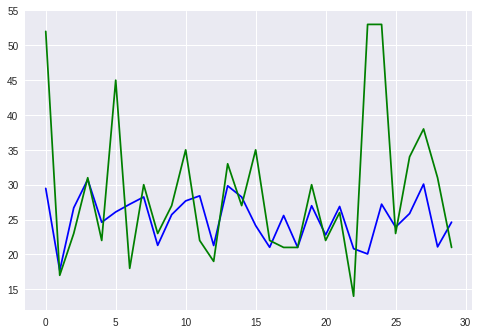

In [33]:
from matplotlib import pyplot
pyplot.plot(y_pred[:30], color="blue")
pyplot.plot(Y[:30].values, color="green")
pyplot.show()

In [0]:
from google.colab import files
files.download('age_prediction.hdf5')